<a href="https://colab.research.google.com/github/RajiniBoini/MyProject1/blob/main/houseprice_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# house_price_prediction.py

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the Boston housing dataset from sklearn
boston = load_boston()

# Step 2: Convert to a pandas DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)

# Add the target variable (house prices) to the DataFrame
data['PRICE'] = boston.target

# Step 3: Split the data into features (X) and target (y)
X = data.drop('PRICE', axis=1)  # Features
y = data['PRICE']  # Target

# Step 4: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Step 9: Plot True vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted House Prices')
plt.grid(True)
plt.show()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


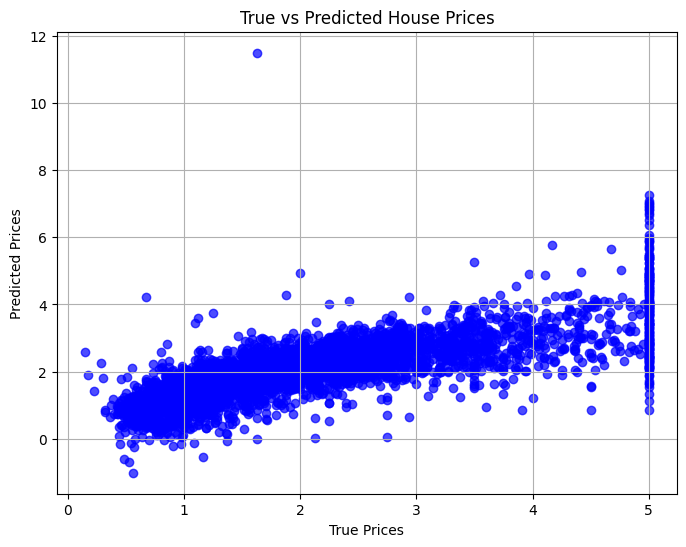

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California housing dataset
housing = fetch_california_housing(as_frame=True)

# Step 2: Convert to a pandas DataFrame
data = housing.frame

# Features (X) and target (y)
X = data.drop('MedHouseVal', axis=1)  # Features
y = data['MedHouseVal']  # Target (median house value)

# Step 3: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Print the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Step 8: Plot True vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted House Prices')
plt.grid(True)
plt.show()


In [ ]:
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

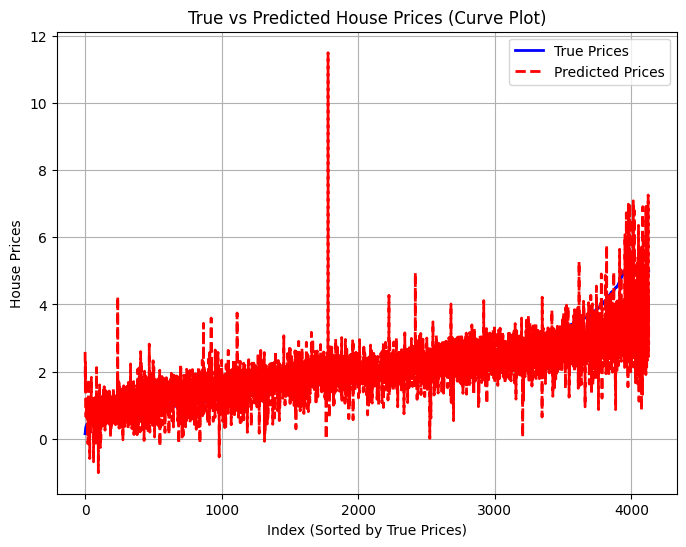

In [ ]:
# Sort the true and predicted values for a smooth curve
sorted_indices = np.argsort(y_test)  # Get indices that would sort y_test
y_test_sorted = y_test.iloc[sorted_indices].reset_index(drop=True)  # Sort y_test and reset index
y_pred_sorted = pd.Series(y_pred[sorted_indices]).reset_index(drop=True)  # Sort y_pred accordingly

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(y_test_sorted, label="True Prices", color='blue', linewidth=2)
plt.plot(y_pred_sorted, label="Predicted Prices", color='red', linestyle="--", linewidth=2)
plt.xlabel("Index (Sorted by True Prices)")
plt.ylabel("House Prices")
plt.title("True vs Predicted House Prices (Curve Plot)")
plt.legend()
plt.grid(True)
plt.show()


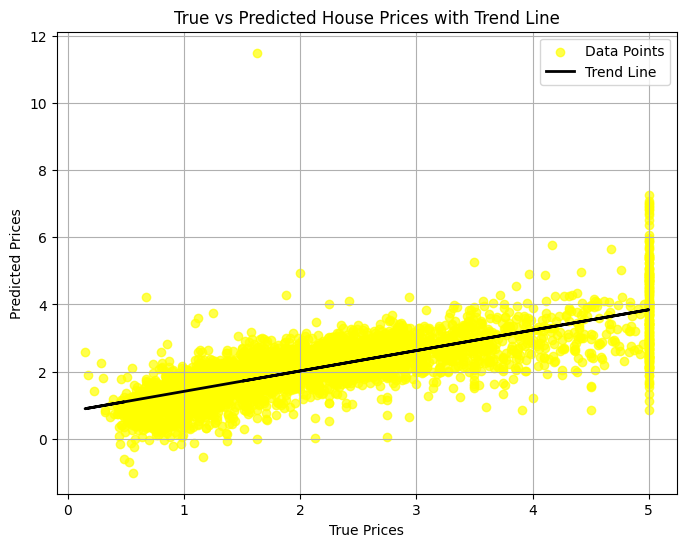

In [ ]:
# Scatter plot of True vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='yellow', alpha=0.7, label="Data Points")

# Add a trend line using numpy's polyfit (linear fit)
coefficients = np.polyfit(y_test, y_pred, 1)  # Linear fit (degree=1)
trend_line = np.poly1d(coefficients)  # Create a trend line function
plt.plot(y_test, trend_line(y_test), color='black', linewidth=2, label="Trend Line")

# Plot details
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted House Prices with Trend Line")
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error (Ridge + Polynomial): 0.4626927594838608
R^2 Score (Ridge + Polynomial): 0.6469096540341306


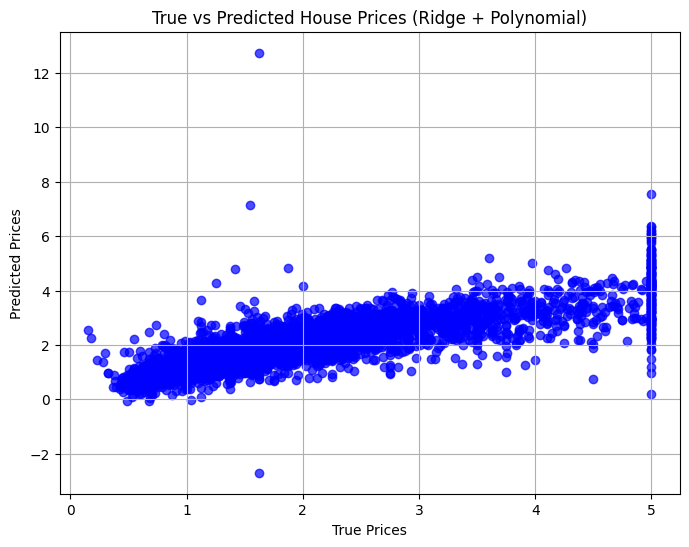

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California housing dataset
housing = fetch_california_housing(as_frame=True)

# Step 2: Convert to a pandas DataFrame
data = housing.frame

# Features (X) and target (y)
X = data.drop('MedHouseVal', axis=1)  # Features
y = data['MedHouseVal']  # Target (median house value)

# Step 3: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (important for Polynomial and Ridge regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Polynomial Regression (degree=2 for quadratic features)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 6: Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # Regularization strength
ridge_model.fit(X_train_poly, y_train)

# Step 7: Make predictions on the test set
y_pred = ridge_model.predict(X_test_poly)

# Step 8: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 9: Print the results
print(f"Mean Squared Error (Ridge + Polynomial): {mse}")
print(f"R^2 Score (Ridge + Polynomial): {r2}")

# Step 10: Plot True vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted House Prices (Ridge + Polynomial)')
plt.grid(True)
plt.show()


Mean Squared Error (Lasso + Polynomial Degree 3): 0.6247683168942074
R^2 Score (Lasso + Polynomial Degree 3): 0.5232264680200072


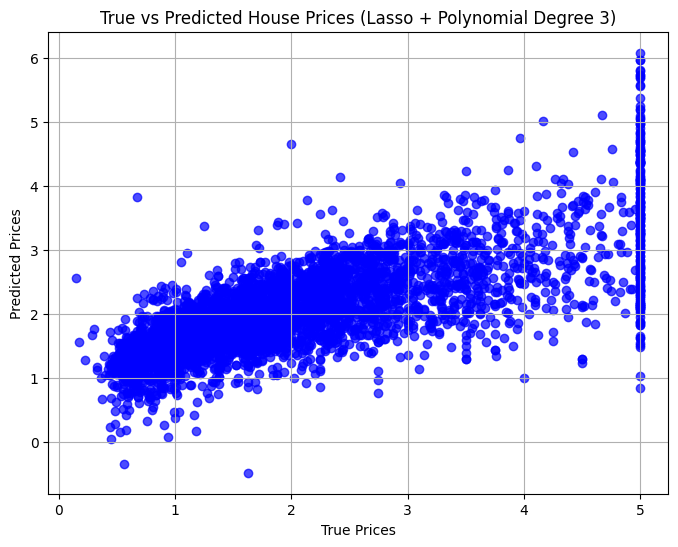

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California housing dataset
housing = fetch_california_housing(as_frame=True)

# Step 2: Convert to a pandas DataFrame
data = housing.frame

# Features (X) and target (y)
X = data.drop('MedHouseVal', axis=1)  # Features
y = data['MedHouseVal']  # Target (median house value)

# Step 3: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (important for Polynomial and Lasso regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Polynomial Regression (degree=3 for cubic features)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 6: Lasso Regression Model
lasso_model = Lasso(alpha=0.1)  # L1 regularization strength (alpha can be tuned)
lasso_model.fit(X_train_poly, y_train)

# Step 7: Make predictions on the test set
y_pred = lasso_model.predict(X_test_poly)

# Step 8: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 9: Print the results
print(f"Mean Squared Error (Lasso + Polynomial Degree 3): {mse}")
print(f"R^2 Score (Lasso + Polynomial Degree 3): {r2}")

# Step 10: Plot True vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted House Prices (Lasso + Polynomial Degree 3)')
plt.grid(True)
plt.show()


In [ ]:
#after adding scaling the MSE is reduced to very low

Mean Squared Error (Random Forest): 0.255169737347244
R^2 Score (Random Forest): 0.8052747336256919


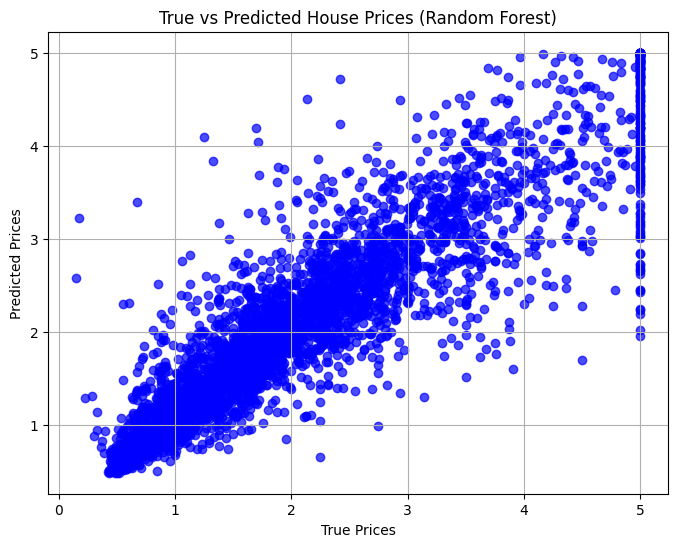

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California housing dataset
housing = fetch_california_housing(as_frame=True)

# Step 2: Convert to a pandas DataFrame
data = housing.frame

# Features (X) and target (y)
X = data.drop('MedHouseVal', axis=1)  # Features
y = data['MedHouseVal']  # Target (median house value)

# Step 3: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (important for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Step 7: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print the results
print(f"Mean Squared Error (Random Forest): {mse}")
print(f"R^2 Score (Random Forest): {r2}")

# Step 9: Plot True vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted House Prices (Random Forest)')
plt.grid(True)
plt.show()
